<a href="https://colab.research.google.com/github/willyan041107/DS1002/blob/main/Assignments/Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ftx-2021-01-01--2023-12-31.csv to ftx-2021-01-01--2023-12-31.csv


In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('ftx-2021-01-01--2023-12-31.csv', sep=';')

In [5]:
print(df.head())

  timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0  2022-12-31T00:00:00.000Z;"2022-12-31T23:59:59....                                
1  2022-12-30T00:00:00.000Z;"2022-12-30T23:59:59....                                
2  2022-12-29T00:00:00.000Z;"2022-12-29T23:59:59....                                
3  2022-12-28T00:00:00.000Z;"2022-12-28T23:59:59....                                
4  2022-12-27T00:00:00.000Z;"2022-12-27T23:59:59....                                


## 2. Get Summary Data


In code, display how many rows and columns are in the raw dataset.

In [7]:
# Display the number of rows and columns in the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 741
Number of columns: 11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [8]:
# Remove any duplicate rows
df = df.drop_duplicates()

# Check for and fill any empty values (Assuming filling with 0 is okay, adjust if necessary)
df = df.fillna(0)

# Drop the specified columns
columns_to_drop = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
df = df.drop(columns=columns_to_drop)

# Assuming data is already ordered by date, if not, order by 'timestamp' or appropriate column
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Ensure timestamp is datetime type
df = df.sort_values('timestamp')  # Sort by timestamp

Now display the first 10 rows of the cleaned dataset.

In [9]:
print(df.head(10))

         open       high       low     close        volume  \
739  6.201133   7.007523  6.171834  6.923968  3.104665e+07   
738  6.948680   7.632146  6.358218  7.514079  4.052611e+07   
737  7.528216   8.714947  7.081120  8.664688  4.947928e+07   
736  8.671285   9.390797  8.425946  9.390797  3.140463e+07   
735  9.386493  10.004872  9.215244  9.562131  4.630334e+07   
734  9.569239   9.726429  8.452265  9.380988  4.228627e+07   
733  9.370450   9.636120  8.728044  9.570511  2.849895e+07   
732  9.571917   9.944797  8.657147  9.308809  3.101239e+07   
731  9.298315   9.298315  7.126050  8.610997  1.013024e+08   
730  8.615143   9.097479  8.040916  8.381133  2.674536e+07   

                           timestamp  
739 2021-01-03 23:59:59.999000+00:00  
738 2021-01-04 23:59:59.999000+00:00  
737 2021-01-05 23:59:59.999000+00:00  
736 2021-01-06 23:59:59.999000+00:00  
735 2021-01-07 23:59:59.999000+00:00  
734 2021-01-08 23:59:59.999000+00:00  
733 2021-01-09 23:59:59.999000+00:00  
732 2

## 4. Calculate Daily Gains/Losses




Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [10]:
# Add a new column for daily change in closing price
df['close_change'] = df['close'].diff()

# Display the dataframe to verify the new column
print(df.head())

         open       high       low     close       volume  \
739  6.201133   7.007523  6.171834  6.923968  31046652.87   
738  6.948680   7.632146  6.358218  7.514079  40526109.15   
737  7.528216   8.714947  7.081120  8.664688  49479278.39   
736  8.671285   9.390797  8.425946  9.390797  31404627.93   
735  9.386493  10.004872  9.215244  9.562131  46303336.73   

                           timestamp  close_change  
739 2021-01-03 23:59:59.999000+00:00           NaN  
738 2021-01-04 23:59:59.999000+00:00      0.590111  
737 2021-01-05 23:59:59.999000+00:00      1.150608  
736 2021-01-06 23:59:59.999000+00:00      0.726110  
735 2021-01-07 23:59:59.999000+00:00      0.171334  


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [11]:
# Find the top 10 days of positive growth
top_growth_days = df.nlargest(10, 'close_change')[['timestamp', 'close_change']]

print(top_growth_days)

                           timestamp  close_change
492 2021-09-01 23:59:59.999000+00:00     16.677156
487 2021-09-06 23:59:59.999000+00:00      9.800320
692 2021-02-19 23:59:59.999000+00:00      8.335900
592 2021-05-24 23:59:59.999000+00:00      6.333923
673 2021-03-09 23:59:59.999000+00:00      5.529699
515 2021-08-09 23:59:59.999000+00:00      5.325192
485 2021-09-08 23:59:59.999000+00:00      5.239728
625 2021-04-26 23:59:59.999000+00:00      4.504385
611 2021-05-05 23:59:59.999000+00:00      4.488174
311 2022-02-28 23:59:59.999000+00:00      4.401841


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [13]:
# Create a new column for the percentage rate of change
df['rate_of_change'] = df['close_change'] / df['close'].shift(1) * 100

# Display the dataframe to verify the new column
print(df.head())

         open       high       low     close       volume  \
739  6.201133   7.007523  6.171834  6.923968  31046652.87   
738  6.948680   7.632146  6.358218  7.514079  40526109.15   
737  7.528216   8.714947  7.081120  8.664688  49479278.39   
736  8.671285   9.390797  8.425946  9.390797  31404627.93   
735  9.386493  10.004872  9.215244  9.562131  46303336.73   

                           timestamp  close_change  rate_of_change  
739 2021-01-03 23:59:59.999000+00:00           NaN             NaN  
738 2021-01-04 23:59:59.999000+00:00      0.590111        8.522727  
737 2021-01-05 23:59:59.999000+00:00      1.150608       15.312701  
736 2021-01-06 23:59:59.999000+00:00      0.726110        8.380101  
735 2021-01-07 23:59:59.999000+00:00      0.171334        1.824484  


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [14]:
# Top 5 days of greatest positive rate change
top_positive_change = df.nlargest(5, 'rate_of_change')[['timestamp', 'rate_of_change']]

# Top 5 days of greatest negative rate change
top_negative_change = df.nsmallest(5, 'rate_of_change')[['timestamp', 'rate_of_change']]

print("Top Positive Changes:\n", top_positive_change)
print("Top Negative Changes:\n", top_negative_change)

Top Positive Changes:
                            timestamp  rate_of_change
53  2022-11-10 23:59:59.999000+00:00       52.868637
492 2021-09-01 23:59:59.999000+00:00       34.382542
692 2021-02-19 23:59:59.999000+00:00       31.766452
24  2022-12-09 23:59:59.999000+00:00       24.684838
48  2022-11-15 23:59:59.999000+00:00       24.488632
Top Negative Changes:
                            timestamp  rate_of_change
55  2022-11-08 23:59:59.999000+00:00      -75.075175
54  2022-11-09 23:59:59.999000+00:00      -58.313683
50  2022-11-13 23:59:59.999000+00:00      -28.705850
597 2021-05-19 23:59:59.999000+00:00      -27.510072
52  2022-11-11 23:59:59.999000+00:00      -26.344388


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

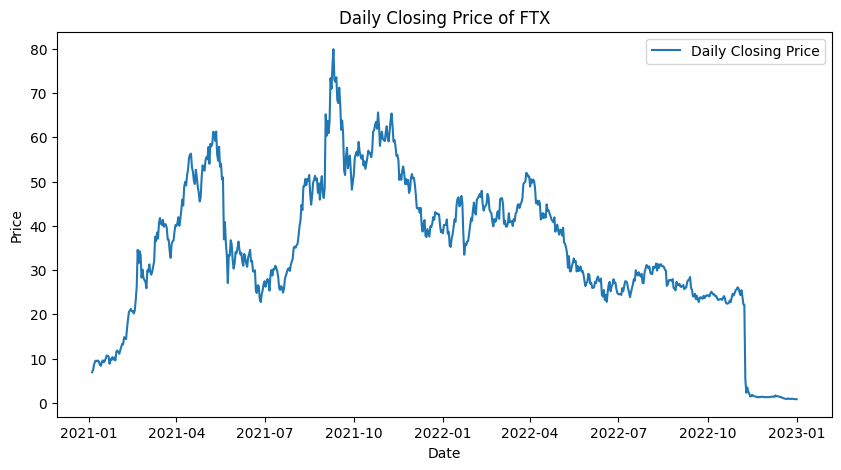

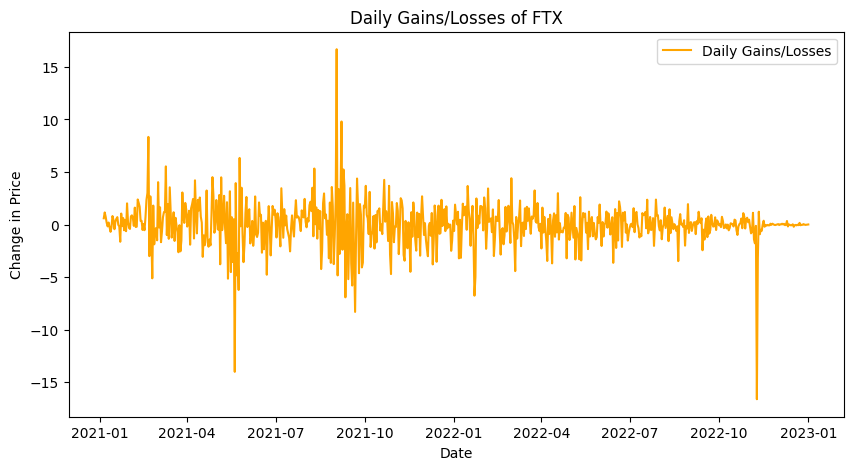

In [15]:
import matplotlib.pyplot as plt

# Plot for daily closing price
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['close'], label='Daily Closing Price')
plt.title('Daily Closing Price of FTX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot for daily gains/losses
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['close_change'], label='Daily Gains/Losses', color='orange')
plt.title('Daily Gains/Losses of FTX')
plt.xlabel('Date')
plt.ylabel('Change in Price')
plt.legend()
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

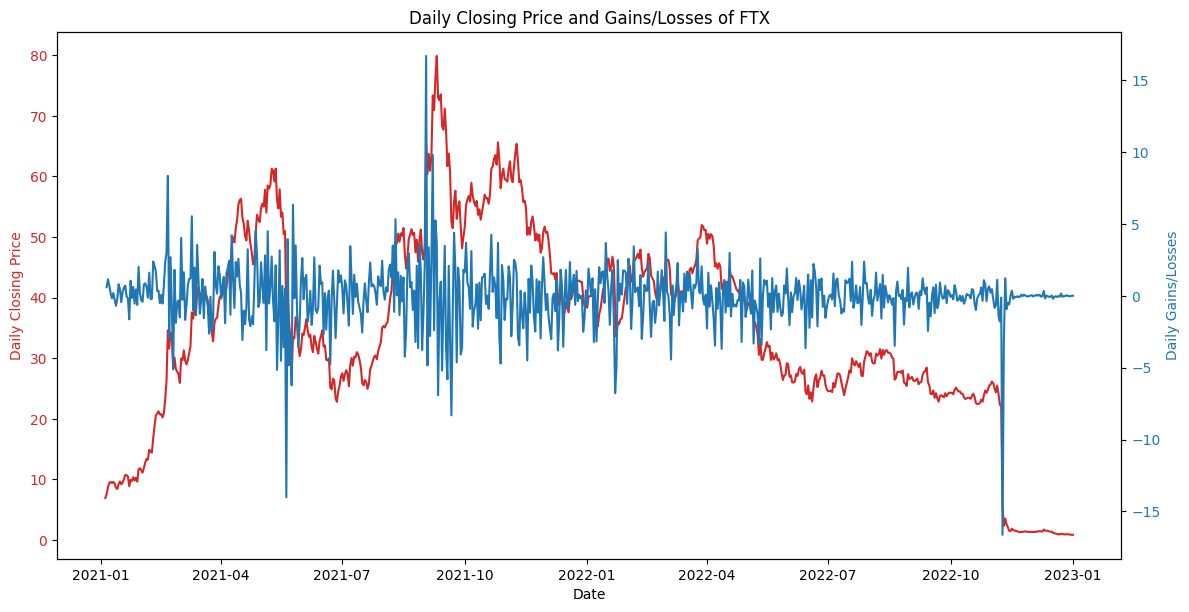

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Closing Price', color=color)
ax1.plot(df['timestamp'], df['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Daily Gains/Losses', color=color)
ax2.plot(df['timestamp'], df['close_change'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Daily Closing Price and Gains/Losses of FTX')
plt.show()